# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu^*}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$


## Imports

In [16]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib.data.func import (DataFunc)
from lib.data.schema import (DataType)
from lib.plots.data import (DataPlotType, stack, curve)
from lib.plots.func import (FuncPlotType, fcompare)
from lib.plots.cumu import (CumuPlotType, cumulative)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [5]:
σ = 1.0
nsample = 1000

def plot_labels_φ(φ):
    return [f"φ={val}" for val in φ]

def plot_labels_μ(μ):
    return [r"$μ^*=$" + f"{val}" for val in μ]

def ar1_series_φ(φ_vals, μ):
    series = []
    for φ in φ_vals:
        series.append(arima.arp_offset([φ], μ, nsample, σ))
    return series

def ar1_series_μ(φ, μ_vals):
    series = []
    for μ in μ_vals:
        series.append(arima.arp_offset([φ], μ, nsample, σ))
    return series

## Simulation $\varphi$ Scan

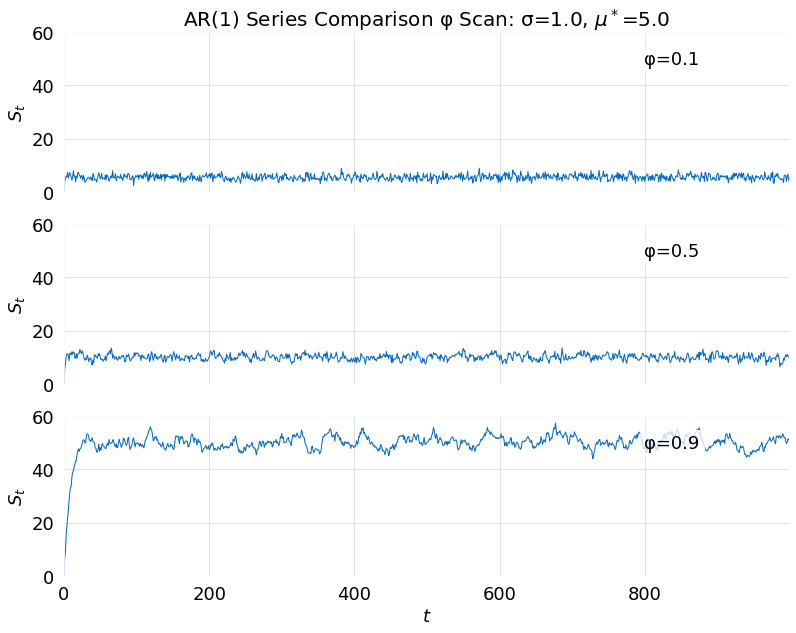

In [7]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ = numpy.array([0.1, 0.5, 0.9])
labels = plot_labels_φ(φ) 
series = ar1_series_φ(φ, μ)
stack(series, ylim=[0.0, 60.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

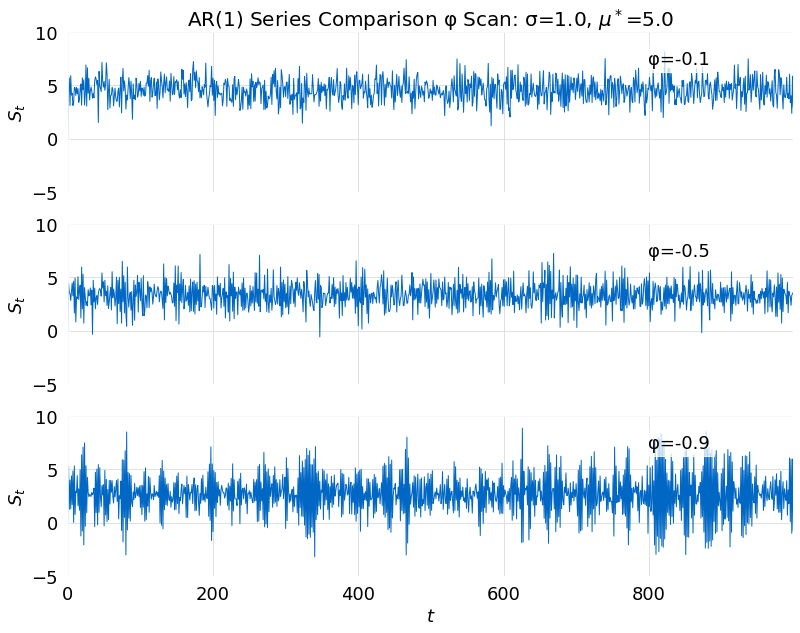

In [8]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ = numpy.array([-0.1, -0.5, -0.9])
labels = plot_labels_φ(φ) 
series = ar1_series_φ(φ, μ)
stack(series, ylim=[-5.0, 10.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Simulation $\mu^*$ Scan

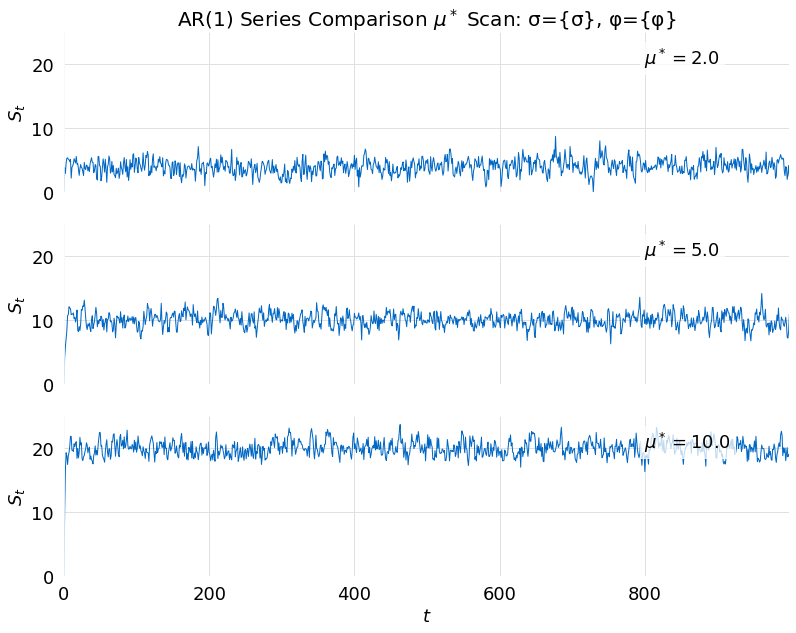

In [9]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + " Scan: σ={σ}, φ={φ}"
μ = numpy.array([2.0, 5.0, 10.0])
labels = plot_labels_μ(μ) 
series = ar1_series_μ(φ, μ)
stack(series, ylim=[0.0, 25.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

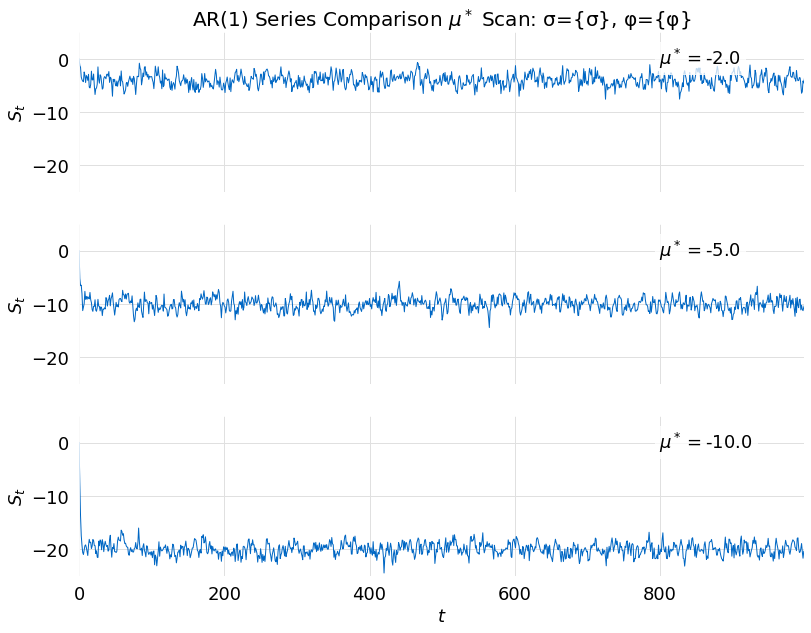

In [10]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + " Scan: σ={σ}, φ={φ}"
μ = numpy.array([-2.0, -5.0, -10.0])
labels = plot_labels_μ(μ) 
series = ar1_series_μ(φ, μ)
stack(series, ylim=[-25.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Mean

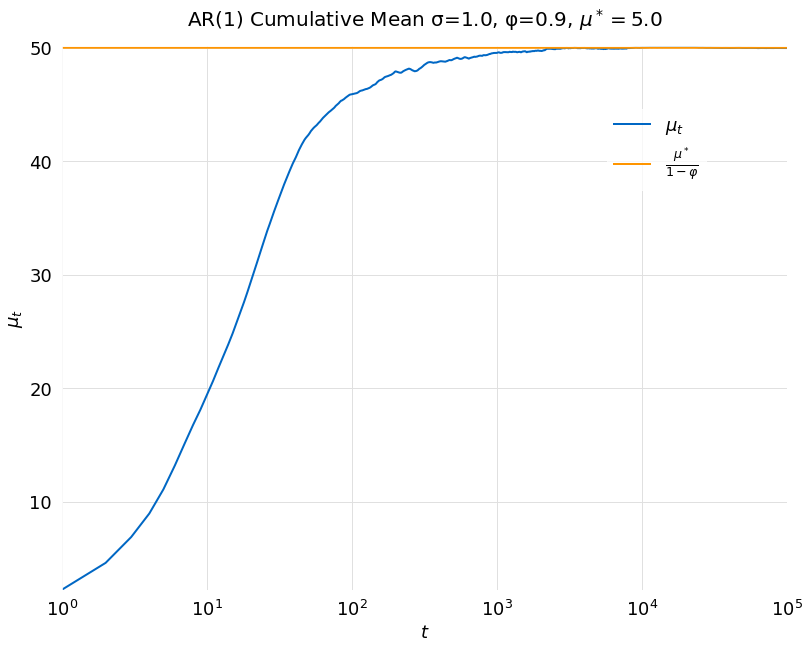

In [23]:
φ = 0.9
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

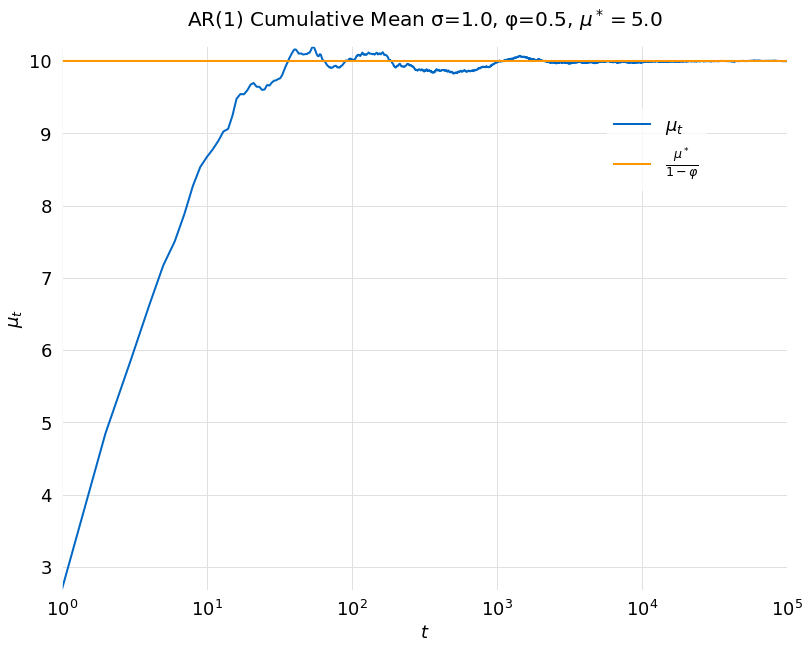

In [24]:
φ = 0.5
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

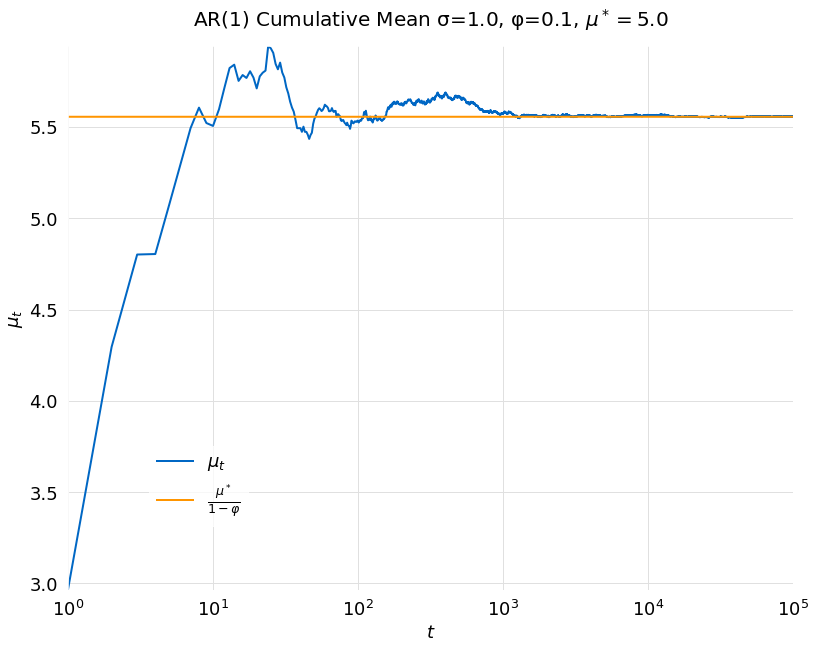

In [26]:
φ = 0.1
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

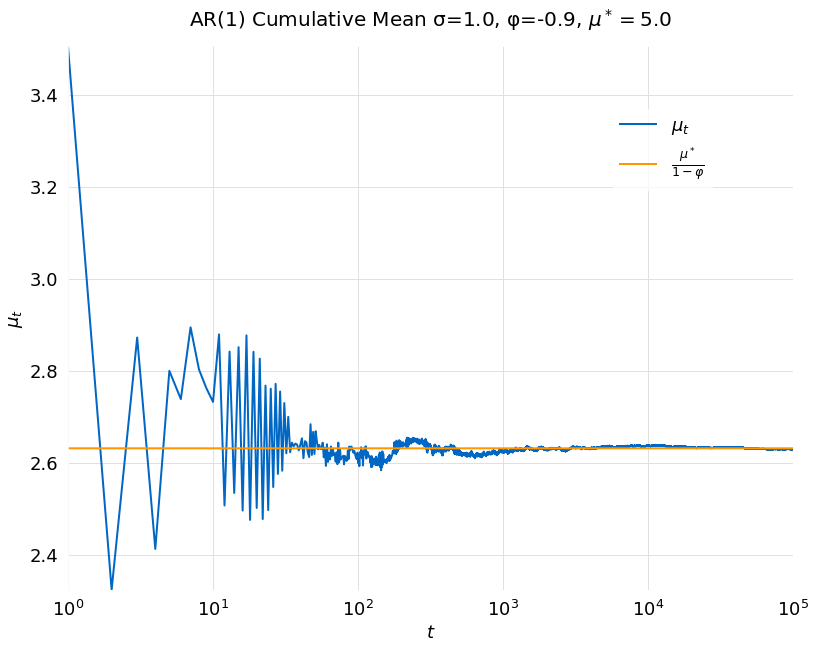

In [27]:
φ = -0.9
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

## Standard Deviation

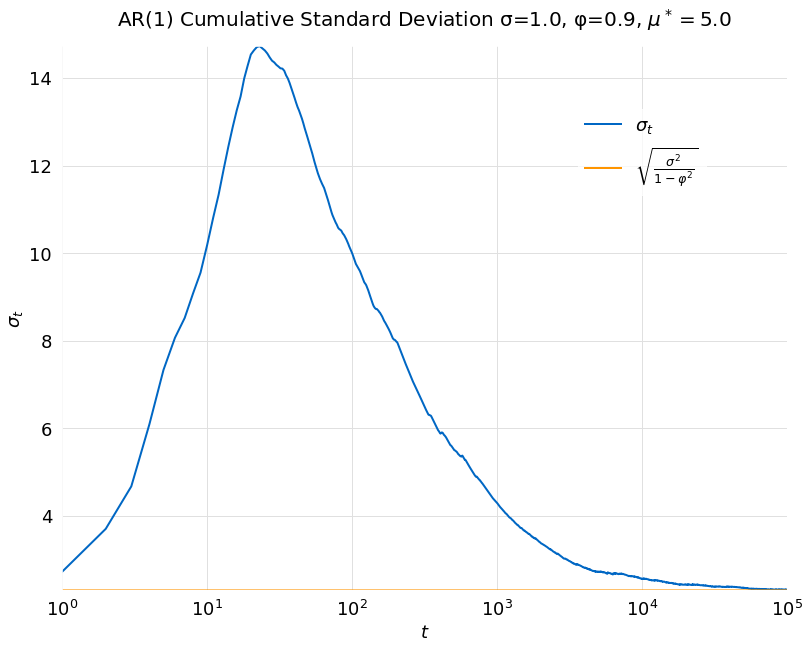

In [50]:
φ = 0.9
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_SD)
cumulative(data, CumuPlotType.AR1_OFFSET_SD, title=title, title_offset=1.025, φ=φ, μ=μ)

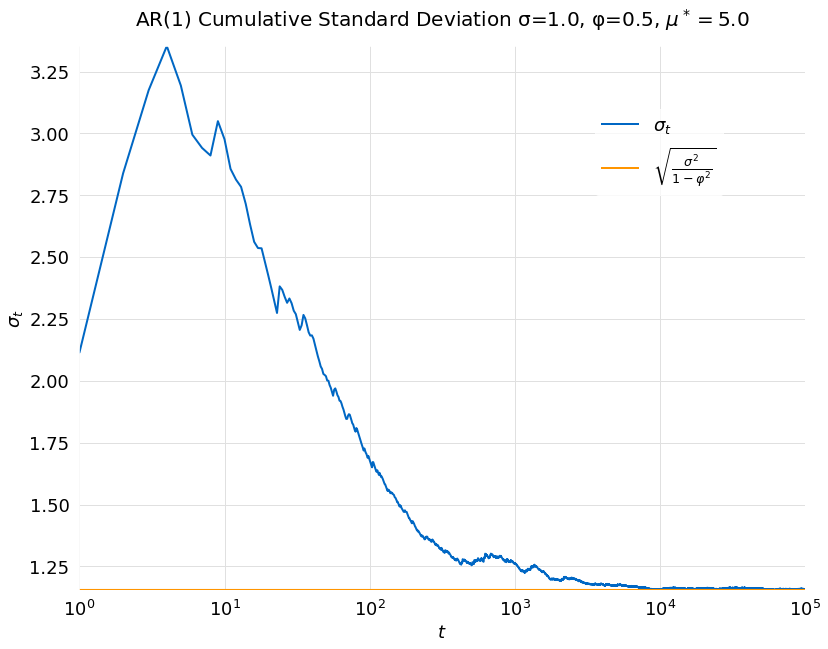

In [51]:
φ = 0.5
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_SD)
cumulative(data, CumuPlotType.AR1_OFFSET_SD, title=title, title_offset=1.025, φ=φ, μ=μ)

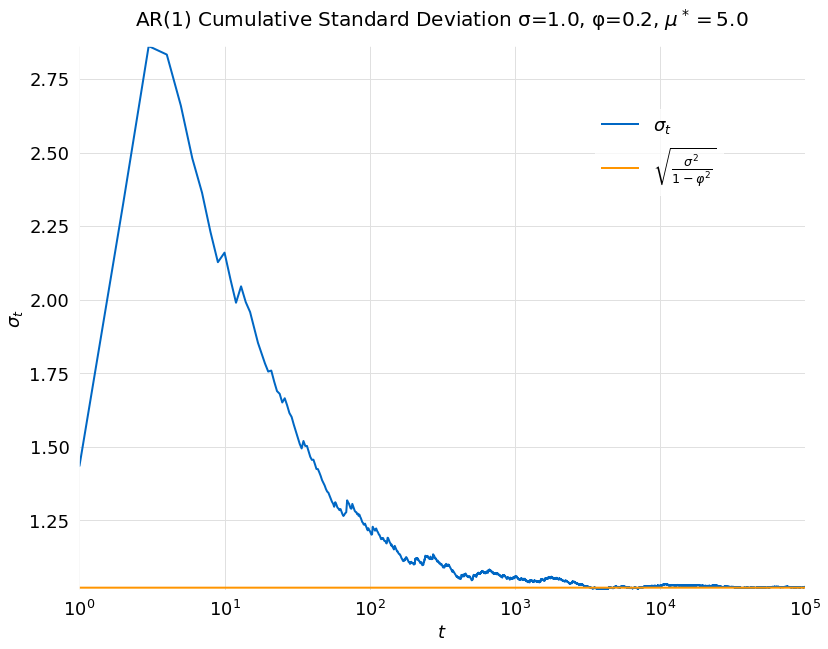

In [52]:
φ = 0.2
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_SD)
cumulative(data, CumuPlotType.AR1_OFFSET_SD, title=title, title_offset=1.025, φ=φ, μ=μ)

## Parameter Estimation

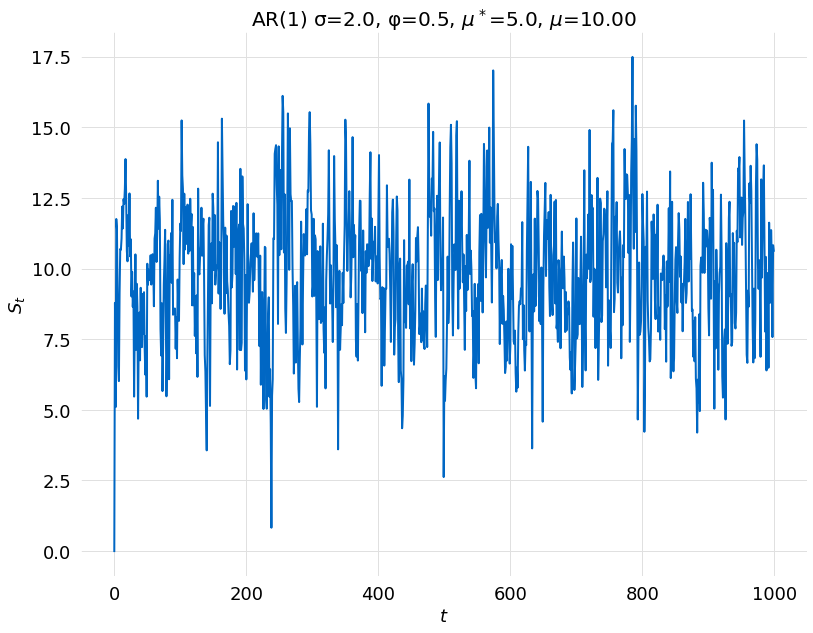

In [56]:
φ = 0.5
μ = 5.0
σ = 2.0
nsample = 1000
samples = arima.arp_offset([φ], μ, nsample, σ)
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*$=" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
curve(samples, plot_type=DataPlotType.TIME_SERIES, title=title)

In [57]:
results = arima.ar_offset_fit(samples, 2)
results.summary()

ValueError: SARIMAX models require univariate `endog`. Got shape (1000, 2).

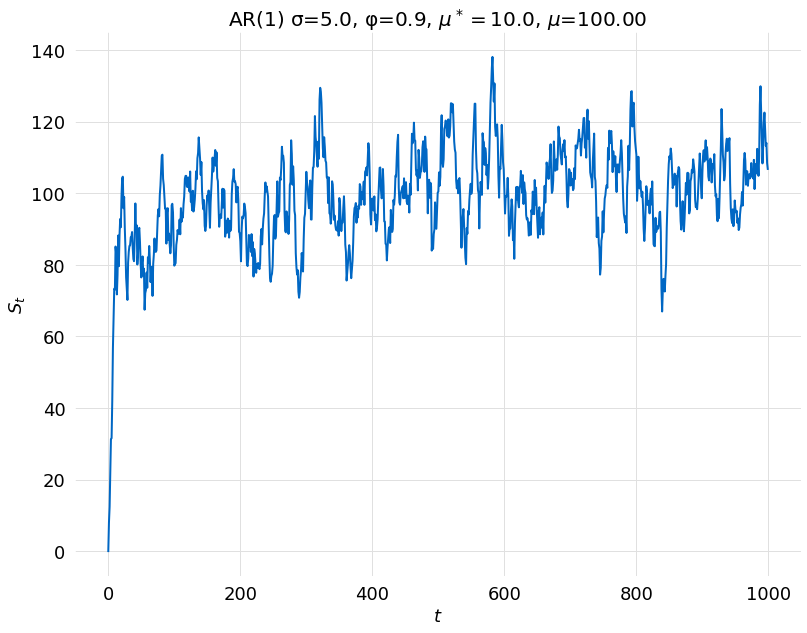

In [59]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
samples = arima.arp_offset([φ], μ, nsample, σ)
curve(samples, plot_type=DataPlotType.TIME_SERIES, title=title)

In [60]:
results = arima.ar_offset_fit(samples, 1)
results.summary()

ValueError: SARIMAX models require univariate `endog`. Got shape (1000, 2).

In [26]:
print(results.conf_int())

[[ 89.34358023 102.23692147]
 [  0.94532281   0.96281305]
 [ 23.16738818  27.90514617]]


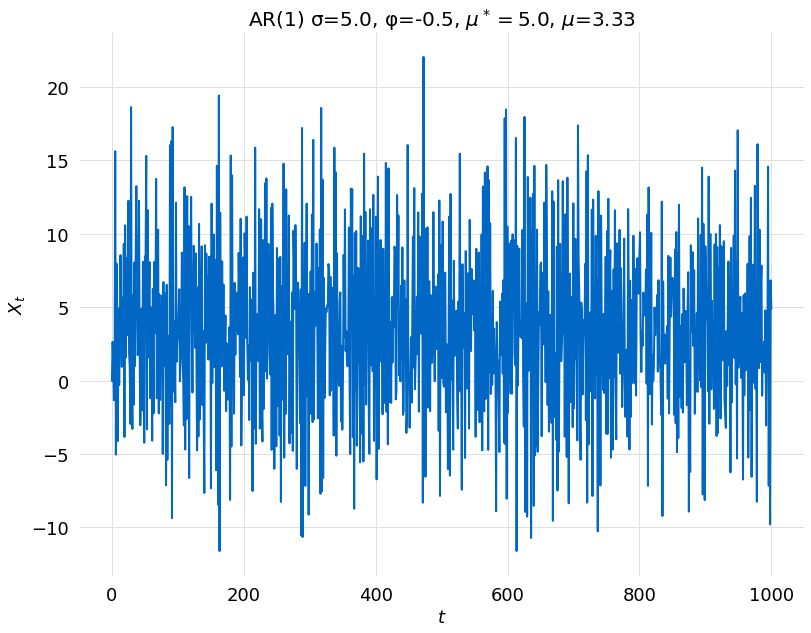

In [18]:
φ = -0.5
μ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
samples = arima.arp_offset([φ], μ, nsample, σ)
curve(samples, plot_type=DataPlotType.TIME_SERIES, title=title)

In [19]:
results = arima.ar_offset_fit(samples, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3016.496
Date:                Sat, 16 Apr 2022   AIC                           6038.993
Time:                        16:05:01   BIC                           6053.716
Sample:                             0   HQIC                          6044.588
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4421      0.102     33.883      0.000       3.243       3.641
ar.L1         -0.5411      0.027    -19.715      0.000      -0.595      -0.487
sigma2        24.4047      1.157     21.100      0.000      22.138      26.672
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.91   Prob(JB):                         0.39
Heteroskedasticity (H):               0.86   Skew:                             0.00
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""